# 2. Word2Vec

In [1]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re
import matplotlib

In [2]:
matplotlib.use("TkAgg")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset
* Julius Caesar
* Macbeth

In [4]:
data_dir = '../data/'

In [5]:
macbeth_file = data_dir + 'macbeth.txt'

In [6]:
caesar_file = data_dir + 'julius_caesar.txt'

### Remove the stopwords

In [7]:
stopword_file = data_dir + 'long_stopwords.txt'

In [8]:
stop_words = []

with open(stopword_file,'r') as inpFile:
    lines = inpFile.readlines()
    stop_words_temp = map(lambda x : re.sub('\n','',x),lines)
    stop_words = map(lambda x:  re.sub('[^A-Za-z0-9]+', '',x), stop_words_temp)


In [9]:
stop_words

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [10]:
type(stop_words)

list

In [11]:
def clean(word):
    word = word.strip()
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]+', '', word)
    if word not in stop_words:
        return word
    else:
        return ''

In [12]:
clean("king's")

'kings'

In [13]:
clean("they'll")

''

In [14]:
line_count = 0
sentences = []

with open(macbeth_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = filter(lambda x:True if len(x) > 0 else False, words)
            sentences.append(words)
            
with open(caesar_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = filter(lambda x:True if len(x) > 0 else False, words)
            sentences.append(words)

In [15]:
type(sentences)

list

## Word2Vec model

In [16]:
model = Word2Vec(sentences, window=5, size=500, workers=4, min_count=5)

/Users/hernan/.pyenv/versions/i2dl/lib/python2.7/site-packages/gensim/models/word2vec.py:456: UserWarning: C extension compilation failed, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn("C extension compilation failed, training will be slow. Install a C compiler and reinstall gensim for fast training.")


In [17]:
model.vocab

{'1': <gensim.models.word2vec.Vocab at 0x112bdd090>,
 '19901993': <gensim.models.word2vec.Vocab at 0x112bd8cd0>,
 '2': <gensim.models.word2vec.Vocab at 0x112bdd0d0>,
 'afraid': <gensim.models.word2vec.Vocab at 0x112be8210>,
 'age': <gensim.models.word2vec.Vocab at 0x1132f9650>,
 'air': <gensim.models.word2vec.Vocab at 0x112a389d0>,
 'alarum': <gensim.models.word2vec.Vocab at 0x112a38b10>,
 'alarums': <gensim.models.word2vec.Vocab at 0x113314490>,
 'alas': <gensim.models.word2vec.Vocab at 0x11328b7d0>,
 'alive': <gensim.models.word2vec.Vocab at 0x1132bce50>,
 'ambition': <gensim.models.word2vec.Vocab at 0x112bbcb50>,
 'ambitious': <gensim.models.word2vec.Vocab at 0x113340150>,
 'amen': <gensim.models.word2vec.Vocab at 0x112be8790>,
 'angry': <gensim.models.word2vec.Vocab at 0x1132e8190>,
 'angus': <gensim.models.word2vec.Vocab at 0x112617850>,
 'anon': <gensim.models.word2vec.Vocab at 0x112a38850>,
 'answer': <gensim.models.word2vec.Vocab at 0x1132cd210>,
 'antony': <gensim.models.word2

In [18]:
labels = []
tokens = []

for word in model.vocab:
    tokens.append(model[word])
    labels.append(word)
    


### TSNE plot to find the similarity of words

In [19]:
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [20]:
new_values = tsne_model.fit_transform(tokens)

In [21]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

/Users/hernan/.pyenv/versions/i2dl/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


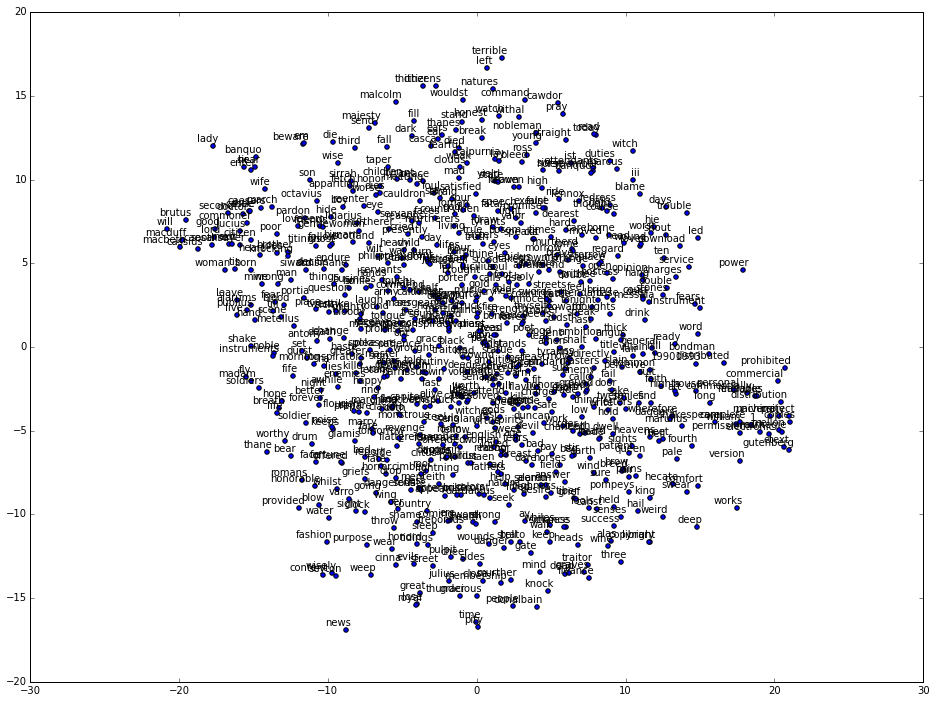

In [22]:
plt.figure(figsize=(16, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

### Analogies

In [23]:
model.most_similar(positive=['caesar','duncan'],negative=['scotland'])

[('brutus', 0.4487351179122925),
 ('cassius', 0.42192769050598145),
 ('will', 0.38408035039901733),
 ('macbeth', 0.3222033381462097),
 ('lord', 0.302024781703949),
 ('exit', 0.2869167923927307),
 ('macduff', 0.2681933641433716),
 ('men', 0.2585955262184143),
 ('good', 0.2463492900133133),
 ('leave', 0.23449480533599854)]

In [24]:
model.most_similar(positive=['caesar','duncan'],negative=['macbeth'])

[('witch', 0.17351451516151428),
 ('copyright', 0.1494285613298416),
 ('mark', 0.14445015788078308),
 ('prohibited', 0.13636432588100433),
 ('ring', 0.13234621286392212),
 ('sickness', 0.13027426600456238),
 ('distributed', 0.12825867533683777),
 ('content', 0.1190776377916336),
 ('shakespeare', 0.11723977327346802),
 ('carnegie', 0.115327849984169)]

In [25]:
model.most_similar(positive=['caesar','macbeth'],negative=['banquo'])

[('brutus', 0.672531008720398),
 ('cassius', 0.6308028697967529),
 ('will', 0.6226643919944763),
 ('macduff', 0.6086530685424805),
 ('good', 0.478791207075119),
 ('lord', 0.4630042016506195),
 ('lucius', 0.4146805703639984),
 ('men', 0.40192413330078125),
 ('second', 0.3868940770626068),
 ('citizen', 0.3814031481742859)]

In [26]:
model.most_similar(positive=['rome','scotland'],negative=['banquo'])

[('house', 0.16446302831172943),
 ('eyes', 0.1440335363149643),
 ('carnegie', 0.13708090782165527),
 ('mark', 0.13072144985198975),
 ('gutenberg', 0.13053037226200104),
 ('ambition', 0.12955959141254425),
 ('charges', 0.12660148739814758),
 ('title', 0.12427174299955368),
 ('distribution', 0.12262588739395142),
 ('copyright', 0.12025685608386993)]

In [27]:
model.doesnt_match("duncan macbeth scotland banquo".split())

'scotland'